# Hypothesis Testing:
>Hypothesis testing using permutation

- toc: true 
- badges: true
- comments: true
- image:https://www.advanceinnovationgroup.com/blog/uploads/images/image_750x_5cc1653c3c4c9.jpg
- author: Uday Paila
- categories: [Hypothesis testing, null hypothesis, 2-sample test, one-sample-test, p-value, anova]

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [37]:
#you can download the data from https://www.kaggle.com/spscientist/students-performance-in-exams
sample_data = pd.read_csv("datasets_74977_169835_StudentsPerformance.csv")

In [40]:
##value counts of educatioin level
sample_data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [43]:
#test preparation 
sample_data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

## Comparing two independent samples
1. 2 groups must be independent with-in groups as well as between the groups. 
2. If we have skewness in the sample distribution, we need more samples for hypothesis testing. 

#### Problem Statement
We have to check whether there is a difference in the math score in students who completed the preparation course and not.

In [45]:
###math scores of test completed and not completed
math_score_with_test = sample_data['math score'][sample_data['test preparation course']=='completed']
math_score_wo_test = sample_data['math score'][sample_data['test preparation course']=='none']

In [48]:
##no of students
print("No of students completed the course", len(math_score_with_test))
print("No of students not completed the course", len(math_score_wo_test))

No of students completed the course 358
No of students not completed the course 642


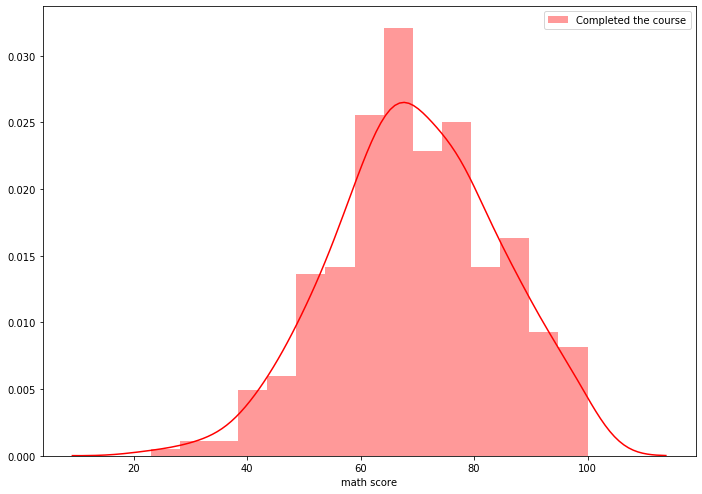

In [54]:
#Plotting distribution of mathscores of compeleted students
sns.distplot(math_score_with_test, hist=True, kde=True, color='red', norm_hist=True, label="Completed the course")
plt.legend()

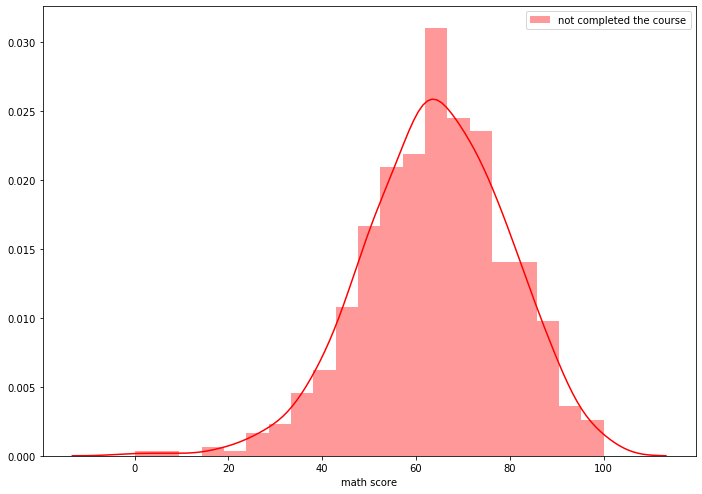

In [53]:
#Plotting distribution of mathscores of not compeleted students
sns.distplot(math_score_wo_test, hist=True, kde=True, color='red', norm_hist=True, label="not completed the course")
plt.legend()

In [62]:
T_obs = math_score_with_test.mean() - math_score_wo_test.mean()
T_obs

5.617649106319291

Simulate the distribution using the permutation test  
#### Permutation simulation 
Let's say we have n1 elements in group1 and n2 elements in the group2. 
1. Combine the group1, group2. 
2. for each permutation data sample
    1. take first n1 elements as group1, rest n2 samples as group2. 
    2. calculate the test statistic

#### Code

In [67]:
##we can get the permutations from np.random.permutations. 
for i in range(5):
    print(np.random.permutation([1, 2, 3, 4, 5]))

[3 2 4 1 5]
[4 3 5 1 2]
[5 1 3 4 2]
[4 2 3 1 5]
[3 2 5 1 4]


In [102]:
data_sample = np.concatenate([math_score_with_test, math_score_wo_test])
n1 = len(math_score_with_test)
dist_test_stat = []
np.random.seed(85)
for i in range(1000000):
    out = np.random.permutation(data_sample) ##random permutation
    ts_cal = out[:n1].mean() - out[n1:].mean() ##getting stat difference
    dist_test_stat.append(ts_cal)

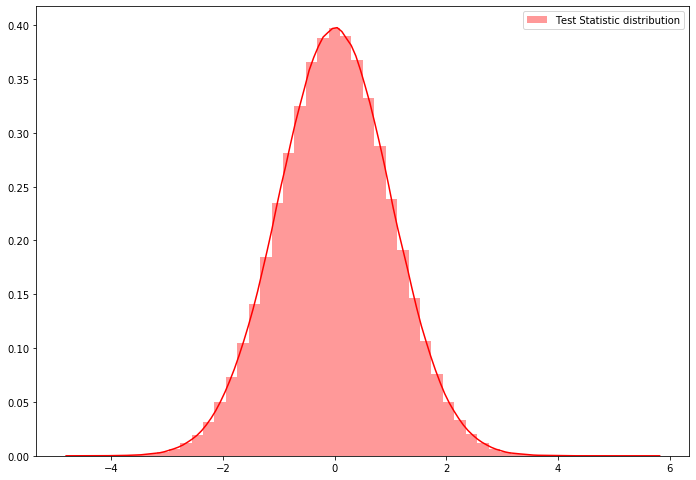

In [103]:
sns.distplot(dist_test_stat, hist=True, kde=True, color='red', norm_hist=True, label="Test Statistic distribution")
plt.legend()

In [195]:
prob = sum(np.array(dist_test_stat)>=T_obs)/1000000

In [110]:
prob

1e-06

In [112]:
P_value = 2*np.min([0.5, prob, 1-prob])
print('P_value', P_value)

P_value 2e-06


Step-6: Make a Decision:

For Significance Level of 5% (95% CL), P_value is very less so we reject the null hypothisis in favour of alternate. 


>Note: In place of Test Statistic, you can use any formulation even t-test/z-test stat also.

#### Code with permute module

In [128]:
from permute.core import two_sample
sample_test = two_sample(x=math_score_with_test, y=math_score_wo_test, reps=100000, 
                         stat='mean', alternative='two-sided', keep_dist=True, seed=10)

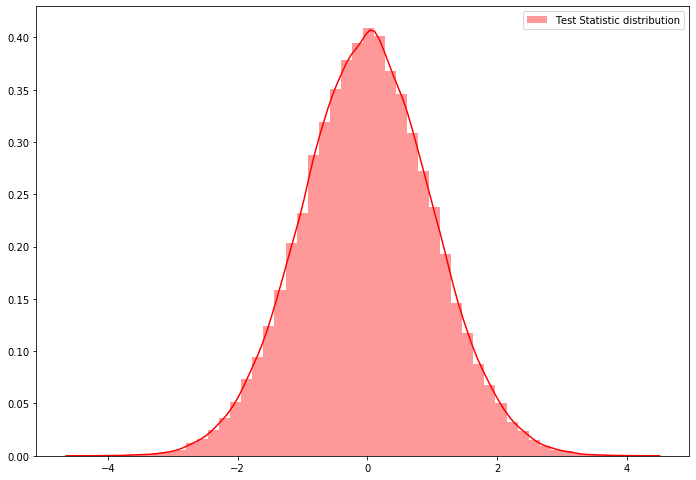

In [161]:
sns.distplot(sample_test[2], hist=True, kde=True, color='red', norm_hist=True, label="Test Statistic distribution")
plt.legend()

In [162]:
print("observed test Statistic", sample_test[1])
print("P-Value", sample_test[0])

observed test Statistic 5.617649106319291
P-Value 1.999980000199998e-05


#### Another way to test
1. Get the CI of the mean(any stat) of two samples. 
2. If those CI not overlap, there is a difference between those. 